In [1]:
#Imports key modules.
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Q1)

Read in the ECDC_surveillance_data file into a pandas dataframe called AMR_df. 

Make sure that missing values (which in this file are indicated by a – character) are changed to NaN.

Print out the column headings of the dataframe and the associated data types.

5 marks.

In [2]:
#Reads in csv file to create a dataframe, converts NumValue into float replacing "-" (the errors) with NaN and prints out column headings and datatypes.
AMR_df = pd.read_csv(r"ECDC_surveillance_data.csv")
AMR_df["NumValue"] = pd.to_numeric(AMR_df["NumValue"], errors="coerce")
AMR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72495 entries, 0 to 72494
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     72495 non-null  int64  
 1   Pathogen       72495 non-null  object 
 2   Antimicrobial  72495 non-null  object 
 3   Indicator      72495 non-null  object 
 4   Unit           72495 non-null  object 
 5   Time           72495 non-null  int64  
 6   RegionName     72495 non-null  object 
 7   NumValue       70679 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 4.4+ MB


# Q2)

Print out the unique values of the Microbe, Antibacterial and Indicator columns.

5 marks.

In [3]:
for i in AMR_df["Pathogen"].unique(): print(i)#Cycles through the Pathogen column and prints unique values.

Acinetobacter spp.
Enterococcus faecalis
Enterococcus faecium
Escherichia coli
Klebsiella pneumoniae
Pseudomonas aeruginosa
Staphylococcus aureus
Streptococcus pneumoniae


In [4]:
for i in AMR_df["Antimicrobial"].unique(): print(i)#Cycles through the Antimicrobial column and prints unique values.

Aminoglycosides
Carbapenems
Combined resistance (fluoroquinolones, aminoglycosides and carbapenems)
Fluoroquinolones
Aminopenicillins
High-level gentamicin
Vancomycin
Combined resistance (third-generation cephalosporin, fluoroquinolones and aminoglycoside)
Third-generation cephalosporins
Ceftazidime
Combined resistance (at least three of piperac. and tazob., fluoroq., ceftaz., aminogl. and carbapenems)
PiperacillinTazobactam
Meticillin (MRSA)
Macrolides
Penicillins


In [5]:
for i in AMR_df["Indicator"].unique(): print(i)#Cycles through the Indicator column and prints unique values.

I - 'susceptible, increased exposure' isolates
R - resistant isolates
R - resistant isolates, percentage
S - susceptible isolates
Total tested isolates
Penicillin non-wild-type isolates, percentage


# Q3)

With the help of the geopandas module, create a map of Europe (You can consider Europe as covering the area between longitude -30 to 40 and latitude 30 to 75) where countries are shaded by percentage of resistant isolates of meticillin resistant Staphylococcus aureus (MRSA) in 2019. 

Create a second map showing the incidence of carbapenem resistant Escherichia coli. in 2019. Comment on the output. 

10 marks.


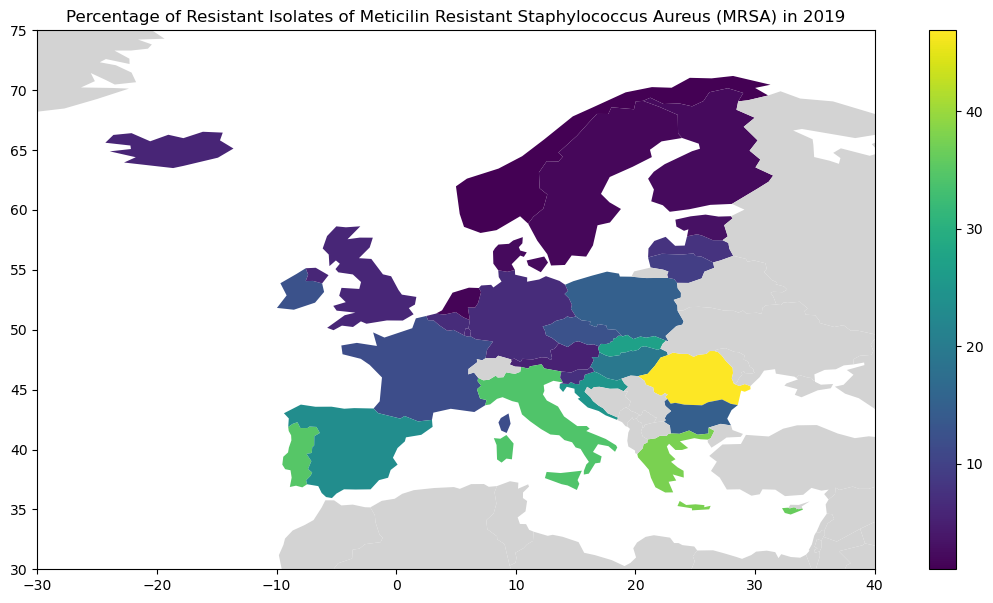

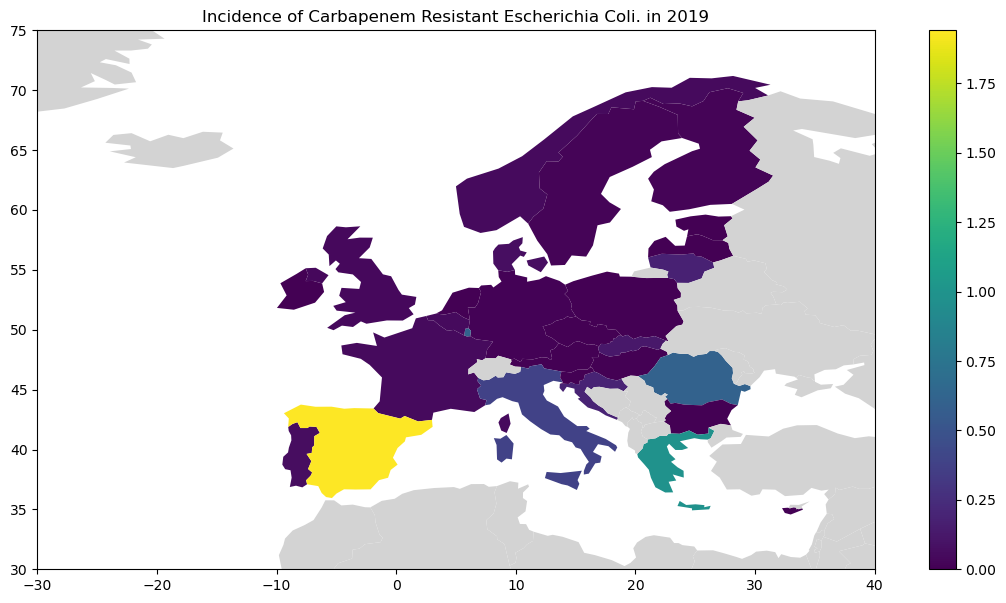

In [6]:
#Import world data and change country name in AMR data to match the name in world data for merging.
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
AMR_df.rename(columns = {"RegionName":"name"}, inplace = True)

#Function called subsets a dataframe to a specific antimicrobial and indicator and then merges that data with map data so it can be plotted.
def slice_func(dataf,antimicrobial,indicator,time):
  slice_df = dataf[dataf["Antimicrobial"]==antimicrobial]
  slice_df = slice_df[slice_df["Indicator"]==indicator]
  slice_df = slice_df[slice_df["Time"]==time]
  return slice_df

#Function to add merge world dataframe to a dataframe.
def map_func(df):
  map_df = world.merge(df, how="left",left_on="name", right_on="name")
  return map_df #Returns a merged dataframe with geopandas map data merging the dataframes on the country name.

#Function called mapplot that plots the map from the inputted dataframe, column from the dataframe and title.
def map_plot_func(dataf,col,title):
  fig,ax = plt.subplots(figsize=(14,7))
  dataf.plot(column=col, ax=ax, legend=True, missing_kwds={"color":"lightgrey"})
  ax.set_xlim(-30,40)
  ax.set_ylim(30,75)
  ax.set_title(title)
  plt.show()


#Creates dataframe for mrsa 2019, merges with world data and plots a map.
mrsa_2019_df = slice_func(AMR_df,"Meticillin (MRSA)","R - resistant isolates, percentage",2019)#Creates a dataframe with map data and the percentage incidence of MRSA resistance.
mrsa_2019_df = map_func(mrsa_2019_df)
map_plot_func(mrsa_2019_df,"NumValue","Percentage of Resistant Isolates of Meticilin Resistant Staphylococcus Aureus (MRSA) in 2019")#Plots MRSA data.

#Creates dataframe for ecoli 2019, merges with world data and plots a map.
ecoli_2019_df = slice_func(AMR_df,"Carbapenems","R - resistant isolates, percentage",2019)#Creates a dataframe with map data and the incidence of carbapenem resistant E.coli.
ecoli_2019_df = ecoli_2019_df[ecoli_2019_df["Pathogen"] == "Escherichia coli"]#Subsets the 2019 dataframe further to only the pathogen E.coli.
ecoli_2019_df = map_func(ecoli_2019_df)
map_plot_func(ecoli_2019_df,"NumValue","Incidence of Carbapenem Resistant Escherichia Coli. in 2019")

In 2019 the incidence of metcillin resistant MRSA is very high, Romania has the largest proportion of resistant isolate,
above 40%. Netherlands, Sweden, Norway, Estonia, Denmark and Finland have the lowest resistance. This suggests that this 
antimicrobial can be used but that an alternative antimicrobial would be more effective.

In 2019 the incidence of carbapenem resistant E.coli is very small with incidence < 3% across Europe. Spain has the highest
incidence at 2%. This suggests carbapenem is an excellent choice of antibiotic for treatment of E.coli.

# Q4)

Determine the change in MRSA incidence rate between 2004 and 2019 for each country and create a map of Europe where countries are shaded by the change in incidence rate.

Identify the country with the largest increase and the country with the largest decrease in MRSA incidence rate in this period. 
Comment on the results.

10 marks.


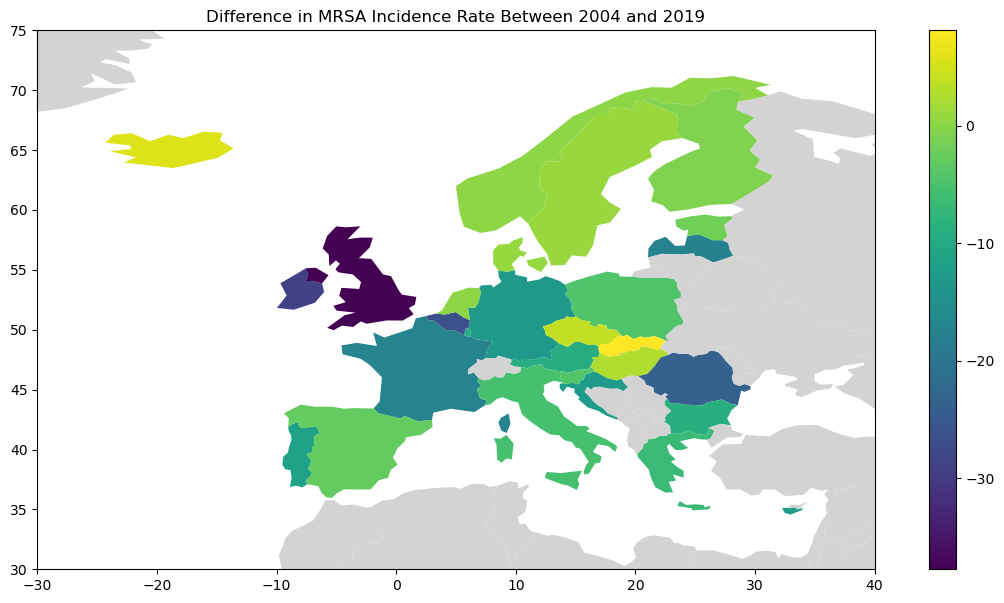

The country with the largest increase in MRSA incidence rate is Slovakia with a 8 % increase.
The country with the largest decrease in MRSA incidence rate is United Kingdomwith a -37 % decrease.


In [7]:
#Gets data for 2004 and 2019 MRSA and merges the two into one dataframe.
mrsa_2004_df = slice_func(AMR_df,"Meticillin (MRSA)","R - resistant isolates, percentage",2004)
mrsa_2019_df = slice_func(AMR_df,"Meticillin (MRSA)","R - resistant isolates, percentage",2019)
mrsa_diff_df = mrsa_2004_df.merge(mrsa_2019_df, how="left",left_on="name", right_on="name")

#Calculates incidence difference between 2019 and 2004 and plots this on a map.
mrsa_diff_df["Diff"] = mrsa_diff_df["NumValue_y"] - mrsa_diff_df["NumValue_x"]
mrsa_diff_df = map_func(mrsa_diff_df)
map_plot_func(mrsa_diff_df,"Diff","Difference in MRSA Incidence Rate Between 2004 and 2019")

#Min and max found alongside corresponding countries and both outputted.
max = mrsa_diff_df["Diff"].max()
min = mrsa_diff_df["Diff"].min()
max_country_df = mrsa_diff_df.loc[mrsa_diff_df["Diff"]==max]
min_country_df = mrsa_diff_df.loc[mrsa_diff_df["Diff"]==min]
max = int(max)#Values changed to int to drop decimal places.
min = int(min)
print("The country with the largest increase in MRSA incidence rate is " + max_country_df.iloc[0][2] + " with a " + str(max) +" % increase.")
print("The country with the largest decrease in MRSA incidence rate is " + min_country_df.iloc[0][2] + "with a " + str(min) + " % decrease.")

The UK has seen the largest decrease in MRSA incidence rate between 2004 and 2019. Across Europe there is a general trend 
of decreasing incidence rate. Some countries have experienced no net change such as Denmark. Slovakia has had the largest 
increase in incidence, by 8.1% and the UK has had the greatest decrease by 37%. This suggests that the UK has been the most
effective country in Europe at decreasing MRSA incidence and that Slovakia has been the least effective.

# Q5)

For each of your assigned microbes and countries create a plot that shows how the incidence rate of resistance to the different antimicrobials changes in the period from 2000 to 2021. 

Comment on the outputs.

10 marks.

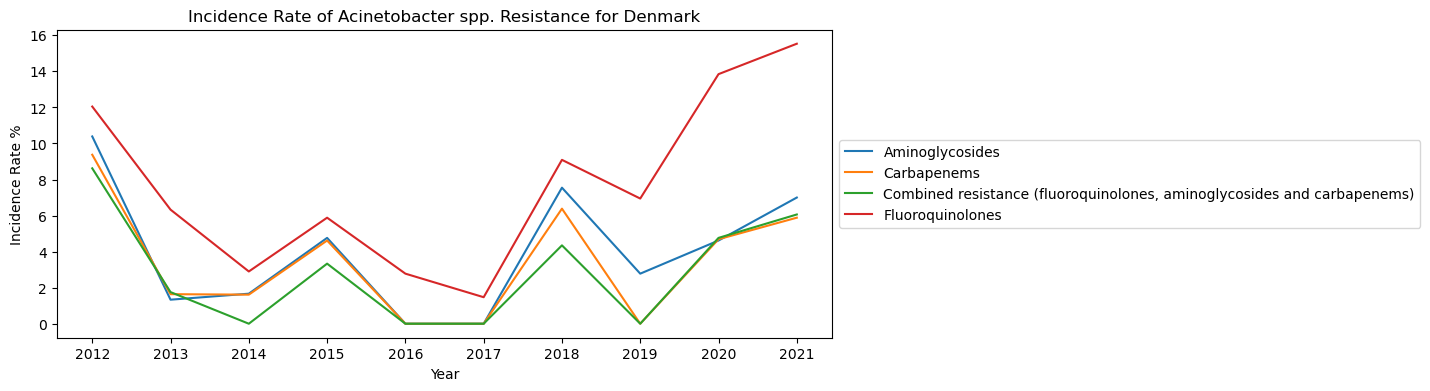

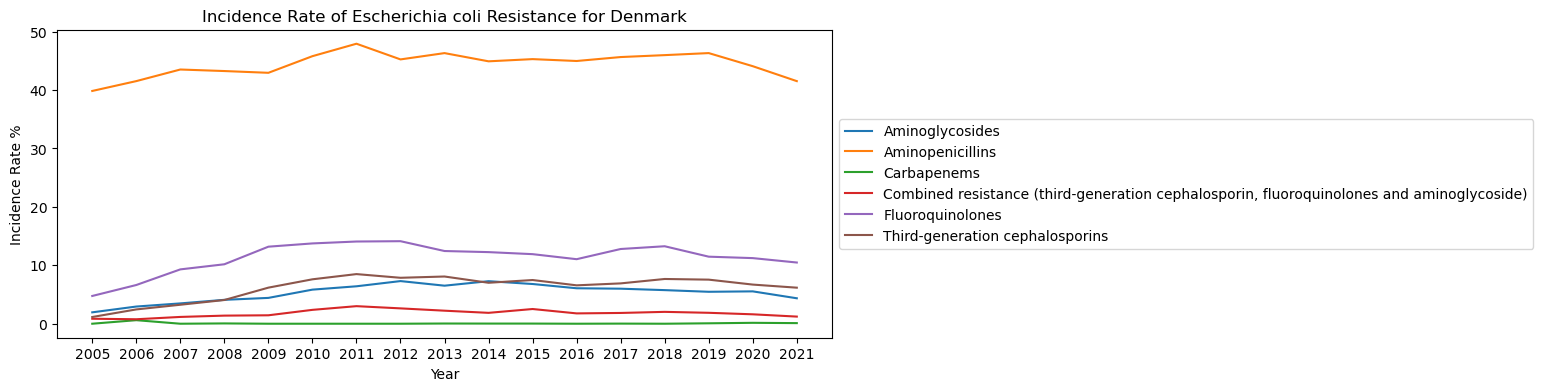

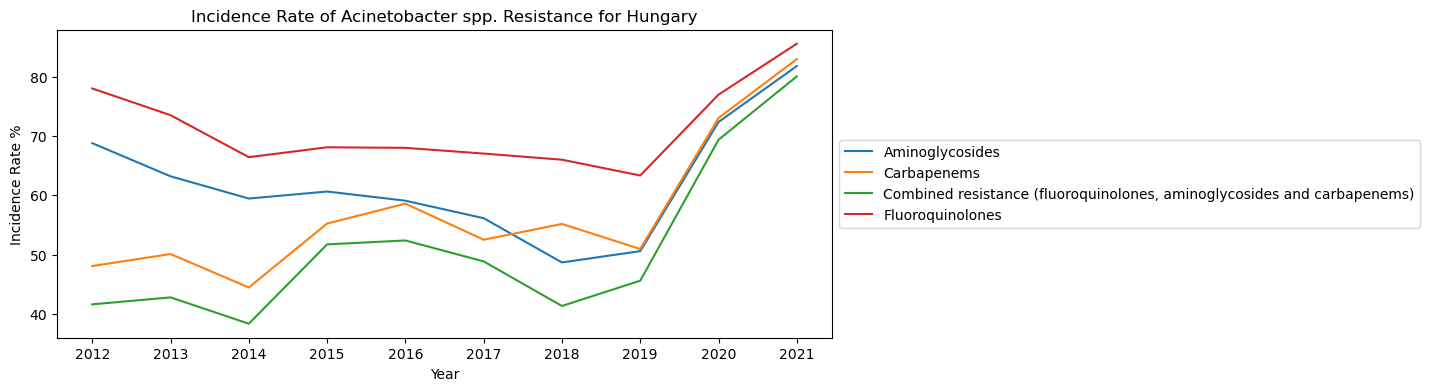

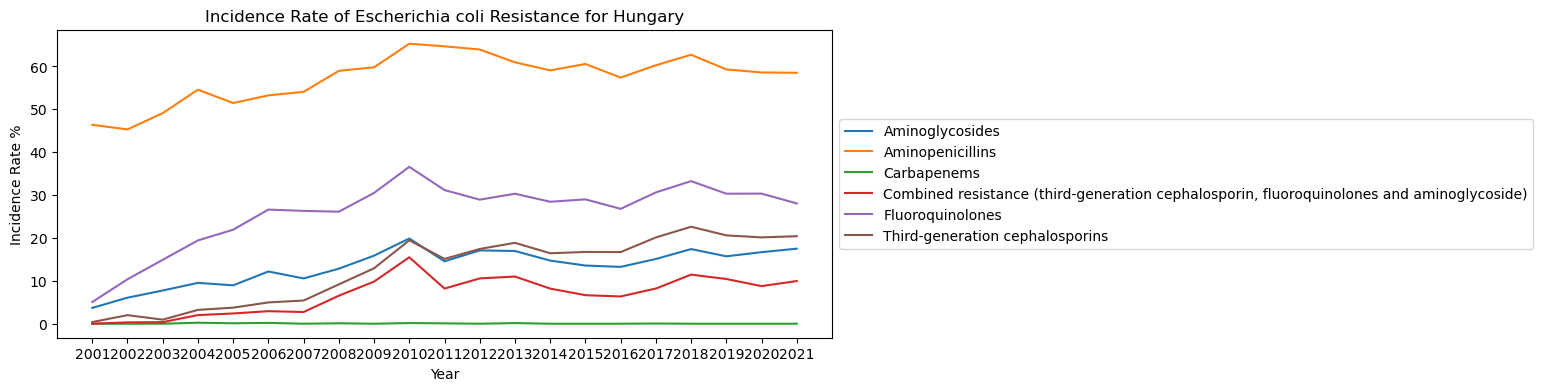

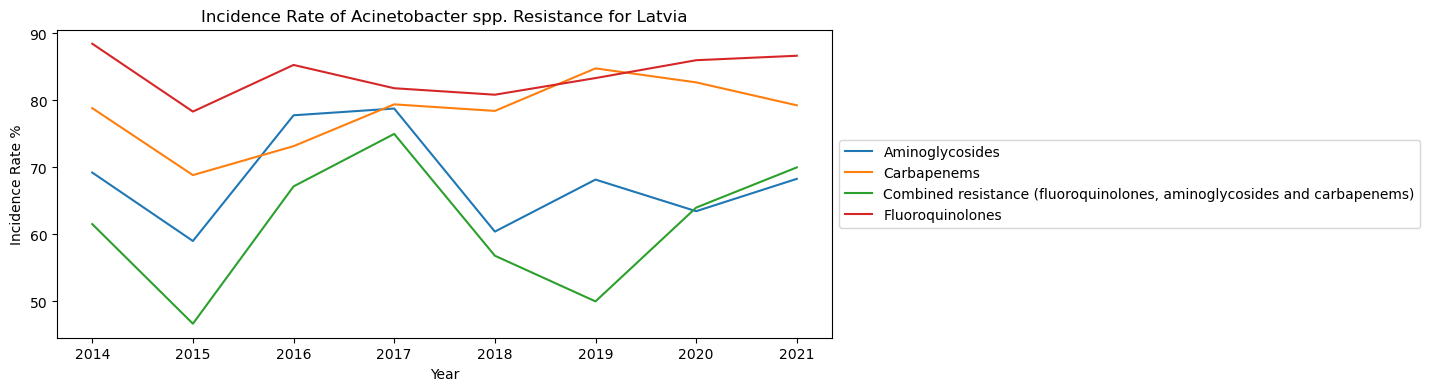

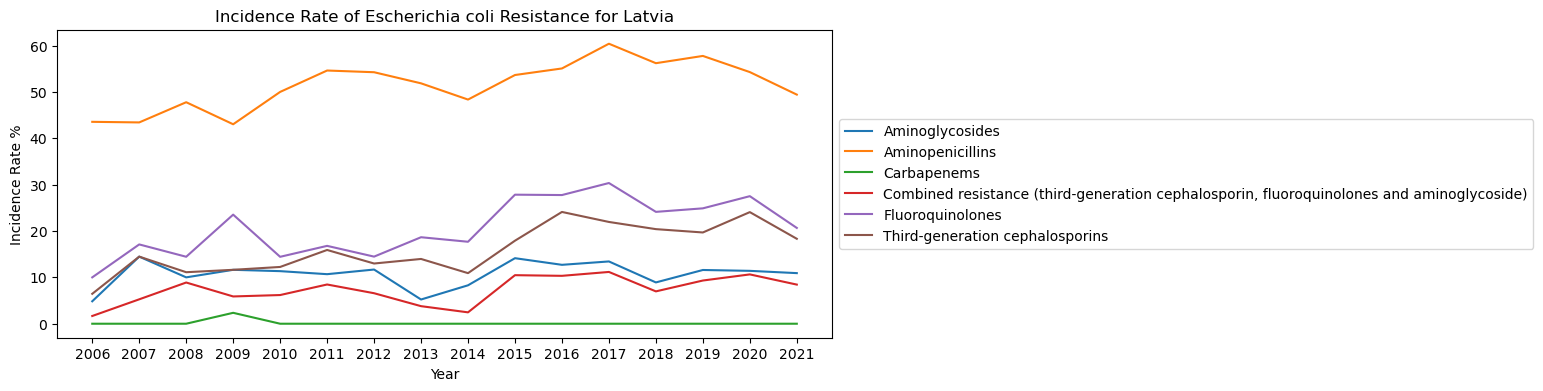

In [8]:
#A function that creates a scatter plot for a specific country and pathogens, plotting Time vs Rate coloured by type of antimicrobial.
def plot(country, pathogen):
  pathogen_df = AMR_df[AMR_df["name"] == country]
  pathogen_df = pathogen_df[pathogen_df["Indicator"]=="R - resistant isolates, percentage"].dropna()
  pathogen_df = pathogen_df[pathogen_df["Pathogen"]==pathogen]

  fig,ax = plt.subplots(figsize=(10,4))
  sns.lineplot(ax=ax,data = pathogen_df, y = "NumValue", x="Time" ,hue = "Antimicrobial")
  ax.set_xticks(pathogen_df["Time"].unique())
  ax.set_xlabel("Year")
  ax.set_ylabel("Incidence Rate %")
  ax.set_title("Incidence Rate of " + pathogen + " Resistance for " + country)
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#The given countries and pathogens stored in lists.
given_countries = ("Denmark","Hungary","Latvia")
given_pathogens = ("Acinetobacter spp.","Escherichia coli")

#Cycles through each country and each pathogen creating a plot for each combination.
for i in given_countries:
  for j in given_pathogens:
    plot(i,j)

Carbapenems remain an excellent choice of antimicrobial for E.coli across all countries, being the antimicrobial with the least resistance. For E.coli reistance is most prevelant for aminopenicillins showing they're the least effective choice for treatment. Rates of resistance for Acinetobacter spp. are far higher than that of E.coli across all antimicrobials tested, which suggests that Acinebacter is more effecitve at acquiring antibacterial resistance. Denmark's resistance rates are far lower than that of both Hungary and Latvia suggesting that out of the three countries Denmarks practices are the best at preventing antimicrobial resistance.

# Q6)

Calculate the total number of tests carried out in each year in each country.

Using the population data available from the natural earth data set within geopandas calculate the number of tests per 10,000 population in each country (testing rate). You may assume the population is constant throughout the period. 

Create a plot showing how testing rates have changed over time in each country and report which country has the highest testing rate and which the lowest in 2021. 

Comment on the outputs.

10 marks.


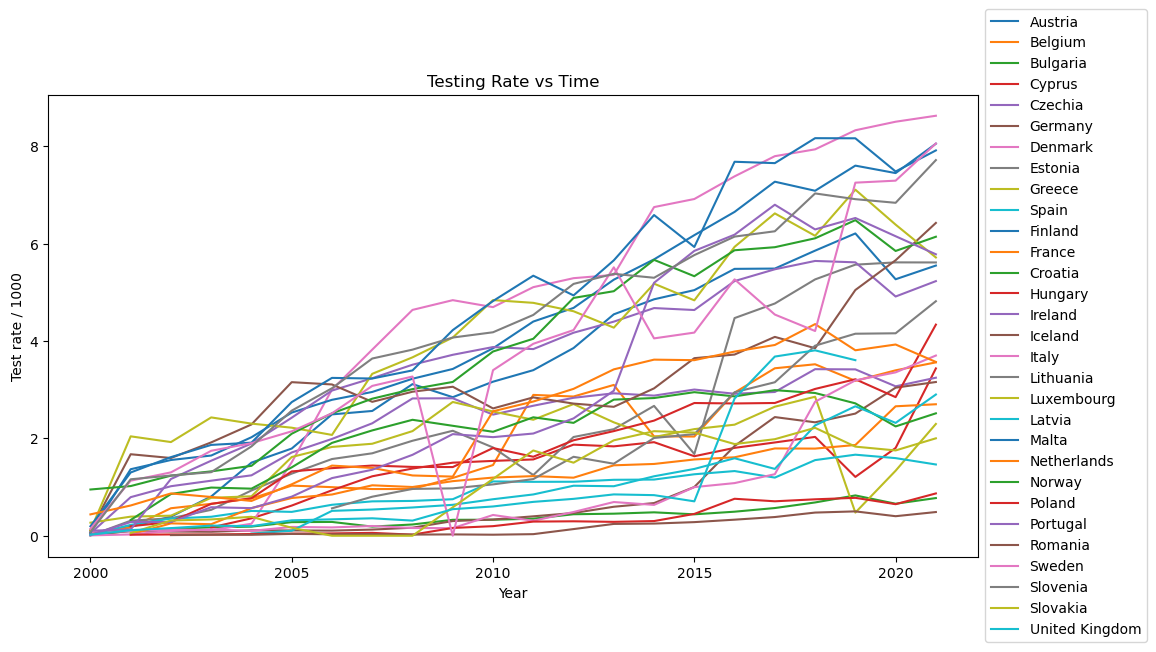

In [9]:
#Adds Malta's population to the rest of the population data and stores the countries being looked at as a list.
pop_data = world.append({"name":"Malta","pop_est":390087}, ignore_index = True)#Population data of Malta year 2000, from Google sourced World Bank and Eurostat.
countries_list = ('Austria','Belgium','Bulgaria','Cyprus','Czechia','Germany','Denmark','Estonia','Greece','Spain','Finland','France','Croatia','Hungary','Ireland','Iceland','Italy','Lithuania','Luxembourg','Latvia','Malta','Netherlands','Norway','Poland','Portugal','Romania','Sweden','Slovenia','Slovakia','United Kingdom')

fig,ax = plt.subplots(figsize=(12,6))

#Function that gets creates a dataframe consisting of the year and the corresponding sum of total tested isolates per country.
def rate_func(input_df,country):
  df = input_df[input_df["name"] == country]
  df = df[df["Indicator"]=="Total tested isolates"]
  total_df = df.groupby('Time').agg({'NumValue':"sum"}, country,)#Sums all test values for each seperate year.
  total_df["name"] = country
  pop_data1 = pop_data[pop_data["name"] == country]
  pop = pop_data1.iloc[0][0]#Obtains the value for that countries estimated population
  total_df["test rate"] = (total_df["NumValue"]/pop)*1000
  return total_df #Returns a dataframe with the total test rates, country name and test rate / 1000


#For loop runs q6 function on every unique country in the antimicrobial dataframe
for i in countries_list:
  country_test_df = rate_func(AMR_df,i)
  ax.plot(country_test_df.index,country_test_df["test rate"], label = i)

#Adds labels, a title and moves the legend to the side of the plot.
ax.set_xlabel("Year")
ax.set_ylabel("Test rate / 1000")
ax.set_title("Testing Rate vs Time")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

Testing rates across the majority of countries have significantly increased across the period. Denmark had the highest testing rate in 2021 and Romania had the lowest. This is a key indicator of a countries ability to handle antimicrobial resistance. This implies that Denmark is in a good position to tackle the problem and that Romania would struggle.

# Q7)

The natural earth dataset contains the total GDP of each country.
Calculate the GDP per capita for each country. 

Create a Seaborn pairplot that shows the correlation between the values of testing rate in 2019, GDP per capita and MRSA resistance rates. 

Comment on the results.

10 marks.

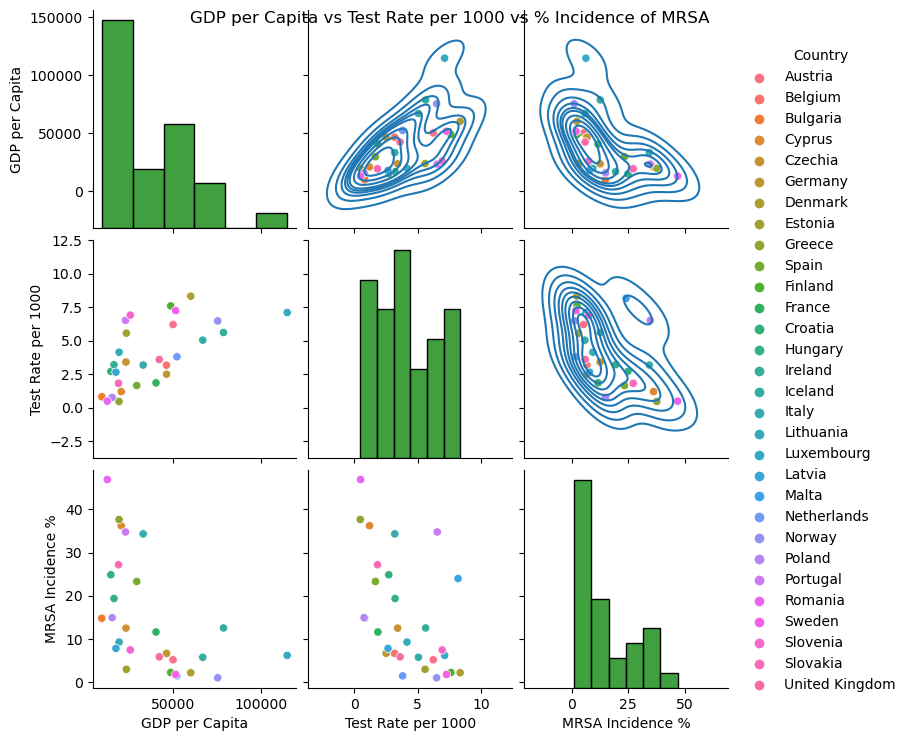

In [10]:
#Gets 2019 data on MRSA and creates a dataframe with column headings.
year_AMR_df = AMR_df[AMR_df["Time"]==2019]
mrsa_2019_df = slice_func(AMR_df,"Meticillin (MRSA)","R - resistant isolates, percentage",2019)
pairplot_df = pd.DataFrame(columns=["Country","GDP per Capita","Test Rate per 1000","MRSA Incidence %"])

#Function to calculate gdp per capita for each country.
def gdp_per_cap_func(country):
  pop_data1 = pop_data[pop_data["name"] == country]
  pop = pop_data1.iloc[0][0]
  gdp = (pop_data1.iloc[0][4])*1000000
  gdp_p_c = gdp / pop
  return gdp_p_c #Returns GDP per capita value.


#Cycles through countries in predefined list and uses above function to calculate gdp.
for i in countries_list:
  gdp = gdp_per_cap_func(i)
  rate_df = rate_func(year_AMR_df,i)
  rate = float(rate_df["test rate"])
  mrsa_country_df = mrsa_2019_df[mrsa_2019_df["name"]==i]
  mrsa_val = float(mrsa_country_df["NumValue"])
  pairplot_df.loc[i]= [i,gdp,rate,mrsa_val]


#Creates a seaborn pair plot comparing data from the dataframe.
sbn_pairplot = sns.pairplot(pairplot_df, hue = "Country")
sbn_pairplot.map_diag(sns.histplot, hue = None, color = "g")
sbn_pairplot.map_upper(sns.kdeplot, hue = None)
sbn_pairplot.fig.suptitle("GDP per Capita vs Test Rate per 1000 vs % Incidence of MRSA")
plt.show()

There is a positive correlation between GDP per capita and testing rate this implies that richer countries put more money into testing capacity and health care. Countries with higher GDP per capita tend to be in the lower half of incidence rate. In opposition to that countries with high test rate per 1000 can still have high incidence. This implies that GDP per capita is more a driver in reducing incidence than test rate which shows that other factors such as accessibilty to health care could be at play. Countries with higher MRSA incidence are likely to have lower testing rates.

# Q8)

Controlling the usage of antibiotics to where they are clinically needed can assist in preventing the emergence of resistance.

The ESAC Net data contains multiple tables of data into the usage of antibiotics across Europe. Data is broken down into community use (ie you are prescribed antibiotics by your GP) and Hospital usage. 

Examine the data in Excel to determine its layout and then, by reading appropriate data into data frames and processing it in your Jupyter Notebook, determine if the level of use of penicillins in the community in 2021 contributes to the prevalence of Aminopenicillin resistant pathogens and if the level of use of quinolones in the community in 2021 contributes to the prevalence of fluoroquinolone resistant pathogens.

15 marks.

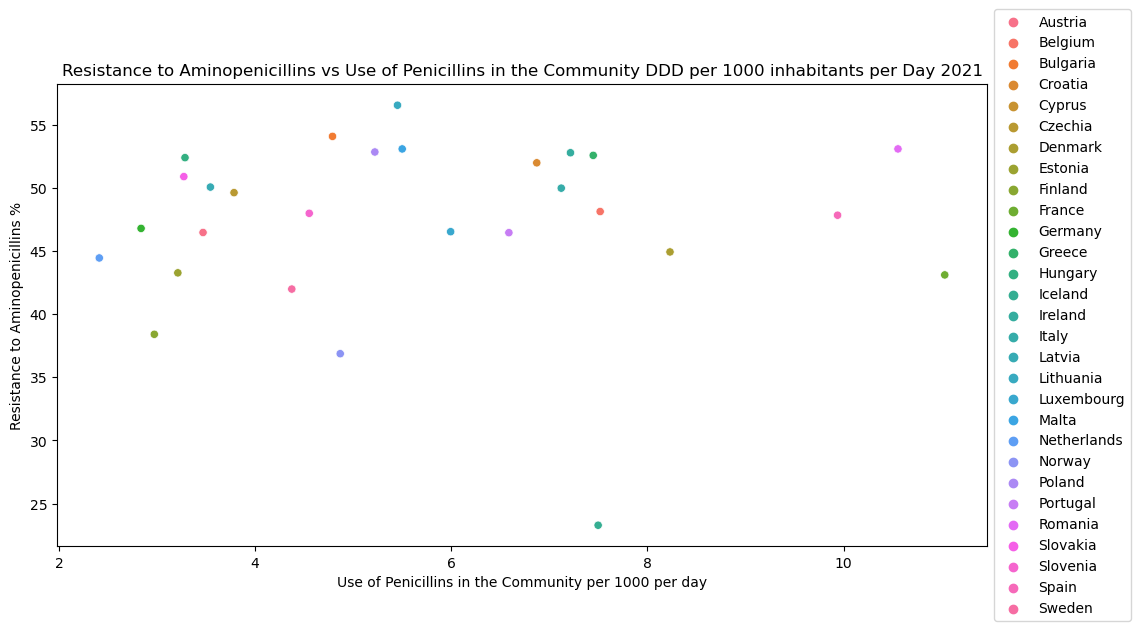

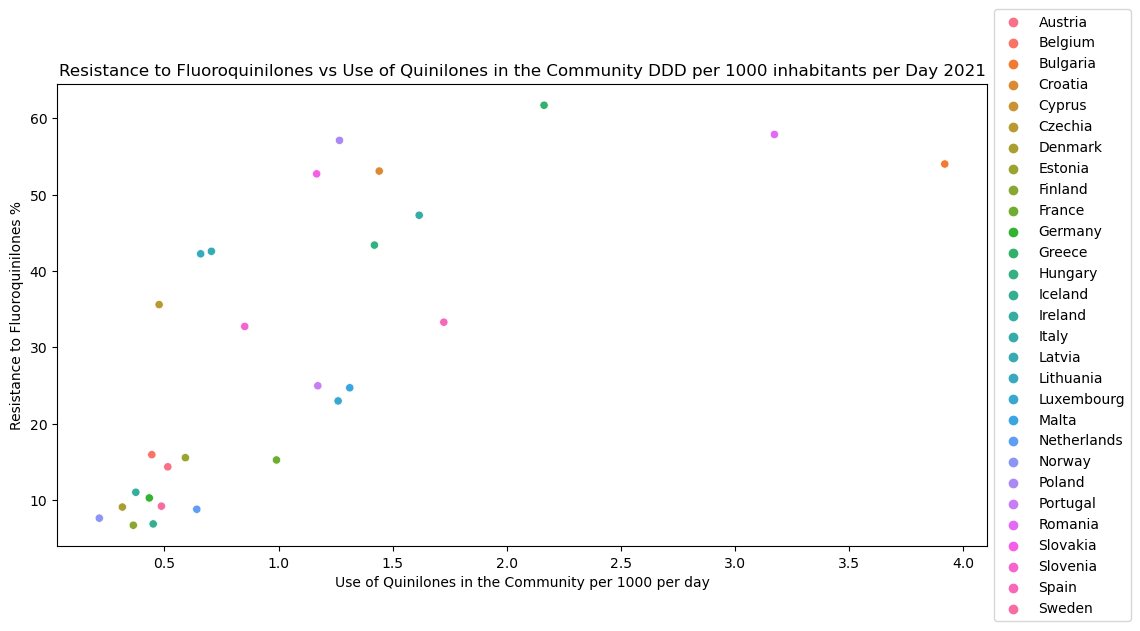

In [11]:
#Reads both required excel sheets in, removes the footer text and stores them in seperate data frames.
peni_comm_df = pd.read_excel(r"ESAC-Net_report_2021_downloadable_tables.xlsx", sheet_name="D2_J01C_AC", header=1, usecols=[0, 10], skipfooter=9)
quin_comm_df = pd.read_excel(r"ESAC-Net_report_2021_downloadable_tables.xlsx", sheet_name='D6_J01M_AC', header=1, usecols=[0, 10], skipfooter=9)

#Function that collates the data for a specific antimicrobial getting the sum of all of the resistant isolates per country in a specified year and merges that with community use data.
def df_func(dataframe_1,antimicrobial,indicator,time,dataframe_2):
  df = slice_func(dataframe_1,antimicrobial,indicator,time)
  df.rename(columns = {"name":"Country name"}, inplace = True)#Changes name so that when the dataframes merge they merge on the shared column.
  df = df.groupby('Country name').agg({'NumValue':"mean"})
  df = df.merge(dataframe_2, how="inner", left_on="Country name", right_on="Country name")
  return df

#Generates the two seperate dataframes for the information on each pathogen.
amino_df = df_func(AMR_df,"Aminopenicillins","R - resistant isolates, percentage",2021,peni_comm_df)
fluoro_df = df_func(AMR_df,"Fluoroquinolones","R - resistant isolates, percentage",2021,quin_comm_df)

#Function that creates seaborn scatterplot plotting the resistance % and community use, with the points coloured based on country.
def plots(df,resistant,antimicrobial):
  fig,ax = plt.subplots(figsize=(12,6))
  sns.scatterplot(ax=ax,data = df, y = "NumValue", x=2021 ,hue = "Country name")
  ax.set_title("Resistance to "+ resistant +" vs Use of " + antimicrobial + " in the Community DDD per 1000 inhabitants per Day 2021")
  ax.set_xlabel("Use of " + antimicrobial + " in the Community per 1000 per day")
  ax.set_ylabel("Resistance to " + resistant + " %")
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.show()

#Porduces two seperate scatterplots for the data with the points coloured by country.
plots(amino_df,"Aminopenicillins","Penicillins")
plots(fluoro_df,"Fluoroquinilones","Quinilones")

There is a strong positive correlation between the use of quinilones in the community and resistance to fluoroquinilone. On the other hand there is a weaker positive correlation between use of penicillins and resistance to aminopenicillins. This makes sense because penicillins comprise of 15 different types of antimicrobial whereas quinilones only consists of 5 different types. As such the proportion of quinilone use that fluoroquinilone makes up is likely to be significant and as such this use will correlate more strongly with its resistance. Whereas for aminopenicillin this is a smaller proportion and so the correlation is weaker.

# Q9)

Based on your analysis comment on the characteristics of countries in Europe that are maintaining low levels of AMR and any challenges in adopting such practices globally.

5 Marks.

Countries with higher GDP tend to have lower incidence of antimicrobial resistance, paring this with an observation that higher testing rates don't necessarily mean lower antimicrobial resistance even though richer countries tend to have higher test rates we can draw the conclusion that other factors are at play. One such example that we would likely observe is that richer countries tend to have better access to better health care and this is likely to contribute.

Another factor is that generally, higher community use of antimicrobials in a population is likely to cause more antimicrobial resistance.

GDP per capita is an indicator of standard of living therefore one such way to combat rising antimicrobial resistance would be to raise the standard of living across countries. However, this is obviously very challenging and expensive. Another way would be to reduce the use of antimicrobials within the community sparing their use only for necessities. Countries with higher MRSA rates tend to also have lower testing rates so testing rates too should be increased, though this is costly.